# Import Required Libraries and Modules
Import the necessary libraries and modules, including the BacteriaVilliCoordinatesGenerator class from generator.py.

In [2]:
# Import BacteriaVilliCoordinatesGenerator class from generator module
from gorgona.generator import LammpsRunFileGenerator

# Create class object
Define and initialize the parameters required for the LammpsRunFileGenerator class. Run this until you obtain more or less the same median and maximum for distributions Gt and Rnd.

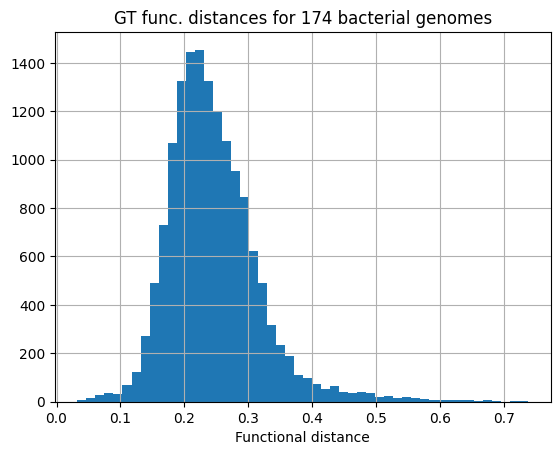

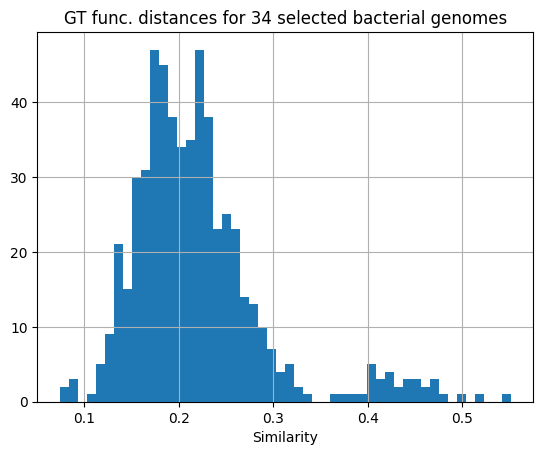

In [3]:
# Define and initialize parameters
params = {"input_bac_amount_file_path": "../data/01_bacteria_amount/bac_amount_74731_mult_62.6690469804568_thresh_10.tsv",
	# input_bac_amount_file_path -- can be any multiplier of the original amount
	"input_func_distances_file_path": "../data/input_files/genome_functional.distances.txt",
	"output_matrices_dir_path": "../data/03_matrices/",
	"plot_figs": True,
	"figures_path": "../data/figures",
    # Add more parameters if needed
}

# Create an instance of BacteriaVilliCoordinatesGenerator
lammps_run_file_generator = LammpsRunFileGenerator(**params)


# Generate pair coefficients

In [4]:
#lammps_run_file_generator.generate_pair_coefficients(output_dir_path="../data/03_pair_coefficients", 
#													 generation_type="bacteria", 
#													 scaling_factor=10e7) # 10e7 for 0.04 bacteria, 10e5 for 0.12 bacteria


lammps_run_file_generator.generate_pair_coefficients(output_dir_path="../data/03_pair_coefficients", 
													 generation_type="both", 
													 scaling_factor=10e7)


# Generate lammps run files

In [5]:
# Bacteria only (gt, rnd, reshuffled)

#lammps_run_file_generator.generate_run_files(coordinates_path="../data/02_coordinates/bacteria_zlimbac_0_3_numbac_76287_bacsize_0.04_bmass_6.4e-05.pos", 
#											 coefficients_path="../data/03_pair_coefficients",
#											 output_dir_path="../data/03_run_experiments_25-06-24_vilbac_0.04_75K", 
#											 generation_type="bacteria", 
#											 coefficients_type="gt", 
#											 processing_units=(10, 10, 1))

# lammps_run_file_generator.generate_run_files(coordinates_path="../../data/02_coordinates/bacteria_zlimbac_0_2.5_numbac_518967_bacsize_0.04_bmass_6.4e-05.pos", 
# 											 coefficients_path="../../data/03_pair_coefficients",
# 											 output_dir_path="../../data/03_run_experiments_21-06-24_vilbac_500K", 
# 											 generation_type="bacteria", 
# 											 coefficients_type="rnd", 
# 											 processing_units=(10, 10, 1))

#lammps_run_file_generator.generate_run_files(coordinates_path="../data/02_coordinates/bacteria_zlimbac_0_3_numbac_76287_bacsize_0.04_bmass_6.4e-05.pos", 
#											 coefficients_path="../data/03_pair_coefficients",
#											 output_dir_path="../data/03_run_experiments_25-06-24_vilbac_0.04_75K", 
#											 generation_type="bacteria", 
#											 coefficients_type="reshuffled", 
#											 processing_units=(10, 10, 1))


# Bacteria and villi (gt, rnd, reshuffled)
lammps_run_file_generator.generate_run_files(coordinates_path="../data/02_coordinates/both_zlimbac_14.5_15.5_numbac_74731_bacsize_0.04_bmass_6.4e-05.pos", 
											 coefficients_path="../data/03_pair_coefficients",
											 output_dir_path="../data/03_run_experiments_08-12-24_vilbac_0.04_75K", 
											 generation_type="both", 
											 coefficients_type="gt", 
											 processing_units=(10, 10, 1))

# lammps_run_file_generator.generate_run_files(coordinates_path="../../data/02_coordinates/both_zlimbac_22.5_25_numbac_518967_bacsize_0.04_bmass_6.4e-05.pos", 
# 											 coefficients_path="../../data/03_pair_coefficients",
# 											 output_dir_path="../../data/03_run_experiments_21-06-24_vilbac_500K", 
# 											 generation_type="both", 
# 											 coefficients_type="rnd", 
# 											 processing_units=(10, 10, 1))

lammps_run_file_generator.generate_run_files(coordinates_path="../data/02_coordinates/both_zlimbac_14.5_15.5_numbac_74731_bacsize_0.04_bmass_6.4e-05.pos", 
											 coefficients_path="../data/03_pair_coefficients",
											 output_dir_path="../data/03_run_experiments_08-12-24_vilbac_0.04_75K", 
											 generation_type="both", 
											 coefficients_type="reshuffled", 
											 processing_units=(10, 10, 1))


# Generate run scripts for cluster

#### Bacteria, gt

In [5]:
params_cluster = {
	"output_dir_path": "../data/03_run_experiments_25-06-24_vilbac_0.04_75K",
	"generation_type": "bacteria",
	"coefficients_type": "gt",
	"processing_units": (10, 10, 1),
	"queue": "eternal",
	"time": "1-00:00:00",
	"memory": 512,
	"nsteps": 3000000,
	"bac_size": 0.04,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 10000,
	"page_size": 100000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004,
	"neighbor_skin_distance": 0.8, # 0.2
	"bac_nve_limit": 0.4375, # 0.625
	"id_bac_cf": 0.4375, # 0.625
	"diff_bac_cf": 0.4375, # 0.625
	"vil_bac_cf": 2.5, # 0.625
	"global_cf": 2.5, # 0.625
}

lammps_run_file_generator.generate_run_script(**params_cluster)

#### Bacteria, reshuffled

In [6]:
params_cluster = {
	"output_dir_path": "../data/03_run_experiments_25-06-24_vilbac_0.04_75K",
	"generation_type": "bacteria",
	"coefficients_type": "reshuffled",
	"processing_units": (10, 10, 1),
	"queue": "eternal",
	"time": "1-00:00:00",
	"memory": 512,
	"nsteps": 3000000,
	"bac_size": 0.04,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 10000,
	"page_size": 100000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004,
	"neighbor_skin_distance": 0.8, # 0.2
	"bac_nve_limit": 0.4375, # 0.625
	"id_bac_cf": 0.4375, # 0.625
	"diff_bac_cf": 0.4375, # 0.625
	"vil_bac_cf": 2.5, # 0.625
	"global_cf": 2.5, # 0.625
}

lammps_run_file_generator.generate_run_script(**params_cluster)

#### Both, gt

In [6]:
params_cluster = {
	"output_dir_path": "../data/03_run_experiments_08-12-24_vilbac_0.04_75K",
	"generation_type": "both",
	"coefficients_type": "gt",
	"processing_units": (10, 10, 1),
	"queue": "marathon",
	"time": "7-00:00:00",
	"memory": 512,
	"nsteps": 3000000,
	"bac_size": 0.04,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 10000,
	"page_size": 100000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004,
	"neighbor_skin_distance": 0.8, # 0.2
	"bac_nve_limit": 0.4375, # 0.625
	"id_bac_cf": 0.4375, # 0.625
	"diff_bac_cf": 0.4375, # 0.625
	"vil_bac_cf": 2.5, # 0.625
	"global_cf": 2.5, # 0.625
}

lammps_run_file_generator.generate_run_script(**params_cluster)

#### Both, reshuffled

In [7]:
params_cluster = {
	"output_dir_path": "../data/03_run_experiments_08-12-24_vilbac_0.04_75K",
	"generation_type": "both",
	"coefficients_type": "reshuffled",
	"processing_units": (10, 10, 1),
	"queue": "marathon",
	"time": "7-00:00:00",
	"memory": 512,
	"nsteps": 3000000,
	"bac_size": 0.04,
	"scaling_factor_for_idbac": 10,
	"scaling_factor_for_vilbac": 10,
	"neigh_modify_size": 10000,
	"page_size": 100000,
	"bac_veloc": 0.000000004,
	"temp_bac": 0.000000004,
	"neighbor_skin_distance": 0.8, # 0.2
	"bac_nve_limit": 0.4375, # 0.625
	"id_bac_cf": 0.4375, # 0.625
	"diff_bac_cf": 0.4375, # 0.625
	"vil_bac_cf": 2.5, # 0.625
	"global_cf": 2.5, # 0.625
}

lammps_run_file_generator.generate_run_script(**params_cluster)

Now copy directory `data/03_run_experiments_25-06-24_vilbac_0.04_75K` to the HPC cluster and run scripts `bash run_lammps.sh` in each of the subfolder. These scripts will run simulations. It's not recommended to run scripts on a desktop machine because it requires much more time. Before running scripts check the content of scripts and make sure it complies with your cluster requirements. Currently all the files are generated for the slurm-based clusters.